# Importación de Paquetes

In [1]:
import numpy as np
import pandas as pd


import matplotlib.pylab as plt 
import matplotlib.gridspec as gridspec
from scipy.signal import butter, lfilter


from sklearn import decomposition

#!pip install mne
import mne as mne

In [2]:
#Clono el repositorio de GitHub en Colab

#!git clone https://github.com/mglucini/tpDMCyT
dirname = '/content/tpDMCyT/data/procesados/'
dirname = '/home/mauro/Escritorio/Facultad/Data Mining/Data Mining en Ciencia y Tecnología/Trabajo Práctico/tpDMCyT/data/procesados/'


# Cargo el Montaje 10-20 y los canales

In [3]:
# Montage 10-20 
mont1020 = mne.channels.make_standard_montage('standard_1020')
# Elijo canales que tengo
kept_channels = ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 
                 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'FC1', 'FC2',
                 'FC5', 'FC6','CP1','CP2','CP5','CP6','AFz','Fpz','POz']

#Armar lista con las posiciones de los canales que poseo
ind = [i for (i, channel) in enumerate(mont1020.ch_names) if channel in kept_channels]
mont1020_30 = mont1020.copy()

# Me quedo solo con los 30 canales seleccionados de los 94 posibles
mont1020_30.ch_names = [mont1020.ch_names[x] for x in ind]
kept_channel_info = [mont1020.dig[x+3] for x in ind]

# Me quedo con las referencias desde dónde están ubicados los canales
mont1020_30.dig = mont1020.dig[0:3]+kept_channel_info
info_eeg = mne.create_info(ch_names=mont1020_30.ch_names, sfreq=128,
                            ch_types='eeg').set_montage(mont1020_30)




In [4]:
info_eeg

<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fpz, Fp2, AFz, F7, F3, Fz, F4, F8, FC5, FC1, FC2, FC6, T7, ...
 chs: 30 EEG
 custom_ref_applied: False
 dig: 33 items (3 Cardinal, 30 EEG)
 highpass: 0.0 Hz
 lowpass: 64.0 Hz
 meas_date: unspecified
 nchan: 30
 projs: []
 sfreq: 128.0 Hz
>

# Cargo datos de Sujetos

## Sujeto 8

### Cargo bl1

In [5]:
sujeto_8_1 = pd.read_csv(dirname+'suj_8_bl_1.txt', sep=',', header=None)

EEG_sujeto_8_1 = sujeto_8_1.to_numpy()
srate=128
ch    = EEG_sujeto_8_1.shape[0]
samples = EEG_sujeto_8_1.shape[1] 

print("Sampling rate: {:.2f} Hz".format(srate))
print("Data shape: {:d} samples x {:d} channels".format(EEG_sujeto_8_1.shape[1], EEG_sujeto_8_1.shape[0]))
print("Tiempo total : {:.2f} ".format(samples/srate))

Sampling rate: 128.00 Hz
Data shape: 7681 samples x 30 channels
Tiempo total : 60.01 


Visualizo la serie temporal con todos los canales

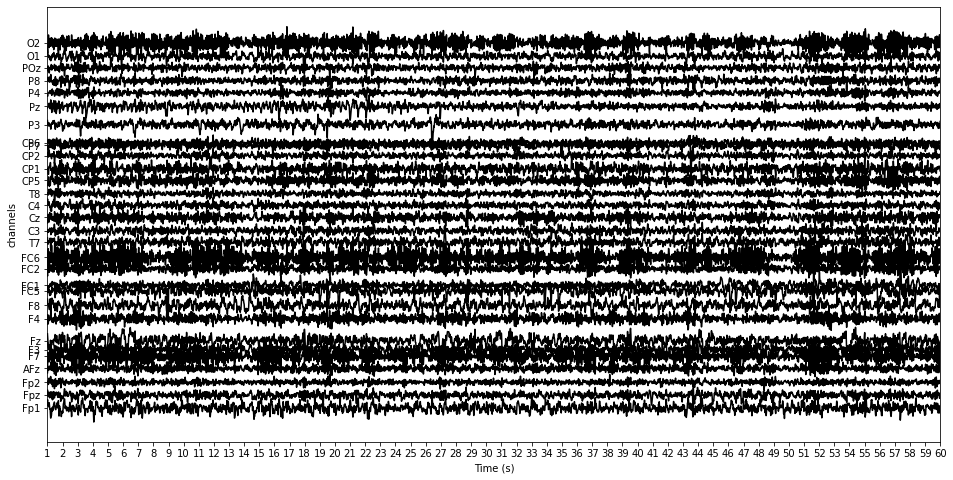

In [6]:
inicio = 1
fin    = 60
xticks = np.arange(inicio*srate,(fin+1)*srate,srate)
fig,ax = plt.subplots(ncols=1,figsize=(16,8))
#fig.suptitle('Series temporales (uV)')
yticks=[]
for c in np.arange(ch):
    temp = EEG_sujeto_8_1[c,inicio*srate:fin*srate]
    dmin=np.min(temp)
    dmax=np.max(temp)
    vmedio = np.mean([dmin,dmax])+30*c
    yticks.append(vmedio)
    ax.plot(np.arange(inicio*srate,fin*srate),vmedio*np.ones_like(temp)+temp,'k')
ax.set_xlim([inicio*srate,fin*srate])
ax.set_xticks(xticks)
ax.set_xticklabels(np.arange(inicio,fin+1))
ax.set_yticks(yticks)
ax.set_yticklabels(mont1020_30.ch_names)
ax.set_ylabel('channels')
ax.set_xlabel('Time (s)')
  
plt.show()

### Cargo bl2

In [7]:
sujeto_8_2 = pd.read_csv(dirname+'suj_8_bl_2.txt', sep=',', header=None)

EEG_sujeto_8_2 = sujeto_8_2.to_numpy()
srate=128
ch    = EEG_sujeto_8_2.shape[0]
samples = EEG_sujeto_8_2.shape[1] 

print("Sampling rate: {:.2f} Hz".format(srate))
print("Data shape: {:d} samples x {:d} channels".format(EEG_sujeto_8_2.shape[1], EEG_sujeto_8_2.shape[0]))
print("Tiempo total : {:.2f} ".format(samples/srate))

Sampling rate: 128.00 Hz
Data shape: 7681 samples x 30 channels
Tiempo total : 60.01 


Visualizo la serie temporal con todos los canales

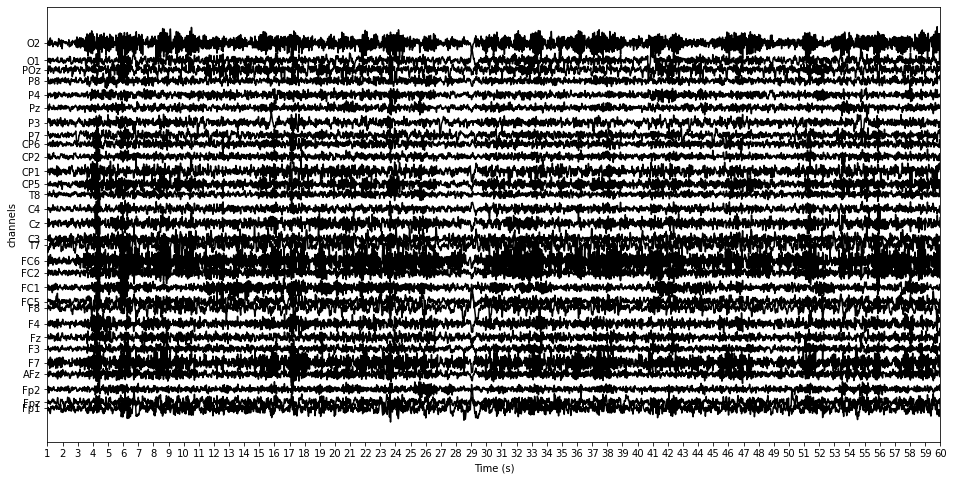

In [8]:
inicio = 1
fin    = 60
xticks = np.arange(inicio*srate,(fin+1)*srate,srate)
fig,ax = plt.subplots(ncols=1,figsize=(16,8))
#fig.suptitle('Series temporales (uV)')
yticks=[]
for c in np.arange(ch):
    temp = EEG_sujeto_8_2[c,inicio*srate:fin*srate]
    dmin=np.min(temp)
    dmax=np.max(temp)
    vmedio = np.mean([dmin,dmax])+30*c
    yticks.append(vmedio)
    ax.plot(np.arange(inicio*srate,fin*srate),vmedio*np.ones_like(temp)+temp,'k')
ax.set_xlim([inicio*srate,fin*srate])
ax.set_xticks(xticks)
ax.set_xticklabels(np.arange(inicio,fin+1))
ax.set_yticks(yticks)
ax.set_yticklabels(mont1020_30.ch_names)
ax.set_ylabel('channels')
ax.set_xlabel('Time (s)')
  
plt.show()

## Sujeto 9

### Cargo bl1

In [9]:
sujeto_9_1 = pd.read_csv(dirname+'suj_9_bl_1.txt', sep=',', header=None)

EEG_sujeto_9_1 = sujeto_9_1.to_numpy()
srate=128
ch    = EEG_sujeto_9_1.shape[0]
samples = EEG_sujeto_9_1.shape[1] 

print("Sampling rate: {:.2f} Hz".format(srate))
print("Data shape: {:d} samples x {:d} channels".format(EEG_sujeto_9_1.shape[1], EEG_sujeto_9_1.shape[0]))
print("Tiempo total : {:.2f} ".format(samples/srate))

Sampling rate: 128.00 Hz
Data shape: 7681 samples x 30 channels
Tiempo total : 60.01 


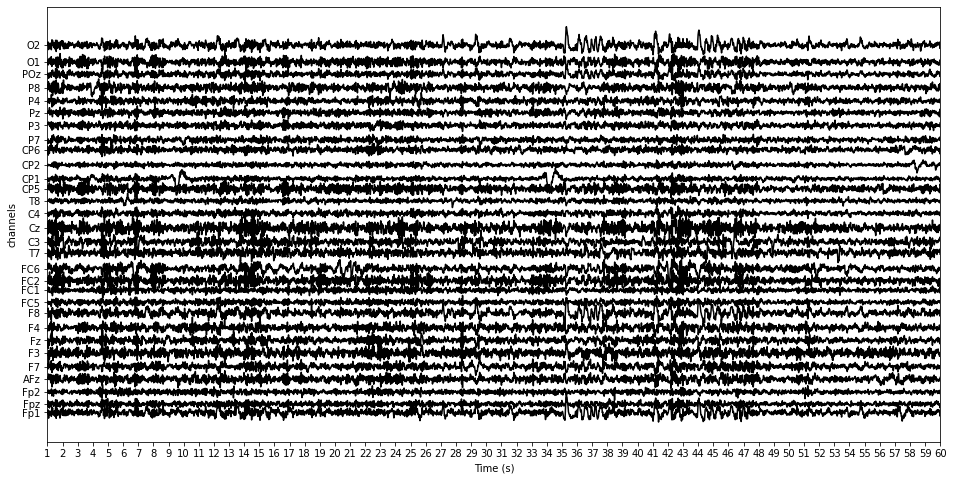

In [10]:
inicio = 1
fin    = 60
xticks = np.arange(inicio*srate,(fin+1)*srate,srate)
fig,ax = plt.subplots(ncols=1,figsize=(16,8))
#fig.suptitle('Series temporales (uV)')
yticks=[]
for c in np.arange(ch):
    temp = EEG_sujeto_9_1[c,inicio*srate:fin*srate]
    dmin=np.min(temp)
    dmax=np.max(temp)
    vmedio = np.mean([dmin,dmax])+30*c
    yticks.append(vmedio)
    ax.plot(np.arange(inicio*srate,fin*srate),vmedio*np.ones_like(temp)+temp,'k')
ax.set_xlim([inicio*srate,fin*srate])
ax.set_xticks(xticks)
ax.set_xticklabels(np.arange(inicio,fin+1))
ax.set_yticks(yticks)
ax.set_yticklabels(mont1020_30.ch_names)
ax.set_ylabel('channels')
ax.set_xlabel('Time (s)')
  
plt.show()

### Cargo bl2

In [11]:
sujeto_9_2 = pd.read_csv(dirname+'suj_9_bl_2.txt', sep=',', header=None)

EEG_sujeto_9_2 = sujeto_9_2.to_numpy()
srate=128
ch    = EEG_sujeto_9_2.shape[0]
samples = EEG_sujeto_9_2.shape[1] 

print("Sampling rate: {:.2f} Hz".format(srate))
print("Data shape: {:d} samples x {:d} channels".format(EEG_sujeto_9_2.shape[1], EEG_sujeto_9_2.shape[0]))
print("Tiempo total : {:.2f} ".format(samples/srate))

Sampling rate: 128.00 Hz
Data shape: 7681 samples x 30 channels
Tiempo total : 60.01 


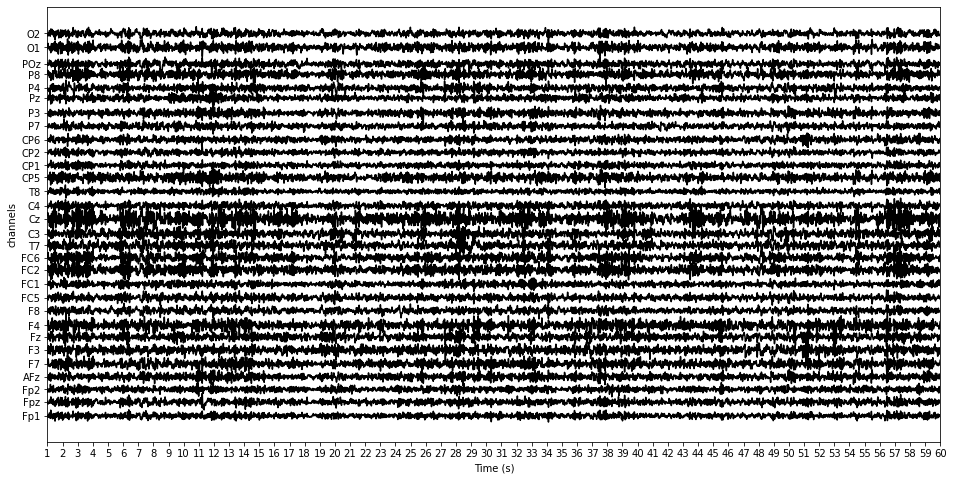

In [12]:
inicio = 1
fin    = 60
xticks = np.arange(inicio*srate,(fin+1)*srate,srate)
fig,ax = plt.subplots(ncols=1,figsize=(16,8))
#fig.suptitle('Series temporales (uV)')
yticks=[]
for c in np.arange(ch):
    temp = EEG_sujeto_9_2[c,inicio*srate:fin*srate]
    dmin=np.min(temp)
    dmax=np.max(temp)
    vmedio = np.mean([dmin,dmax])+30*c
    yticks.append(vmedio)
    ax.plot(np.arange(inicio*srate,fin*srate),vmedio*np.ones_like(temp)+temp,'k')
ax.set_xlim([inicio*srate,fin*srate])
ax.set_xticks(xticks)
ax.set_xticklabels(np.arange(inicio,fin+1))
ax.set_yticks(yticks)
ax.set_yticklabels(mont1020_30.ch_names)
ax.set_ylabel('channels')
ax.set_xlabel('Time (s)')
  
plt.show()

## Sujeto 10

### Cargo bl1

In [13]:
sujeto_10_1 = pd.read_csv(dirname+'suj_10_bl_1.txt', sep=',', header=None)

EEG_sujeto_10_1 = sujeto_10_1.to_numpy()
srate=128
ch    = EEG_sujeto_10_1.shape[0]
samples = EEG_sujeto_10_1.shape[1] 

print("Sampling rate: {:.2f} Hz".format(srate))
print("Data shape: {:d} samples x {:d} channels".format(EEG_sujeto_10_1.shape[1], EEG_sujeto_10_1.shape[0]))
print("Tiempo total : {:.2f} ".format(samples/srate))

Sampling rate: 128.00 Hz
Data shape: 7681 samples x 30 channels
Tiempo total : 60.01 


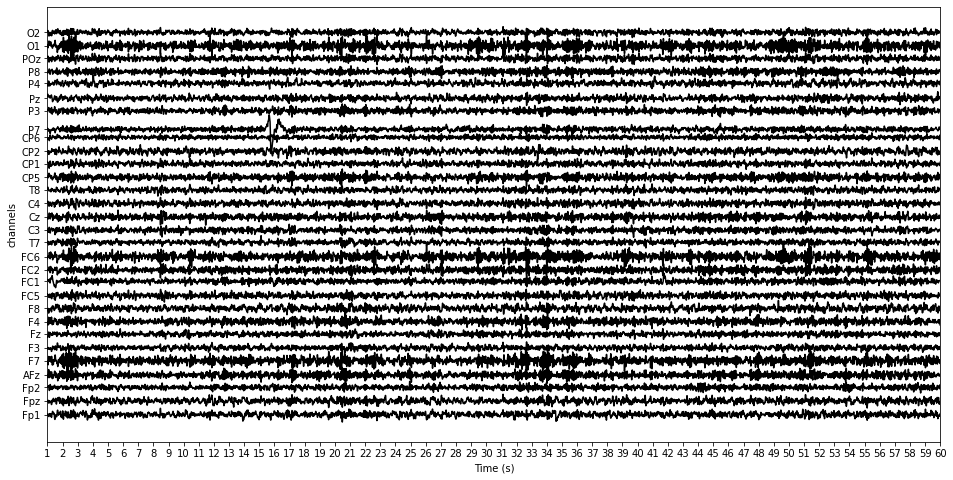

In [14]:
inicio = 1
fin    = 60
xticks = np.arange(inicio*srate,(fin+1)*srate,srate)
fig,ax = plt.subplots(ncols=1,figsize=(16,8))
#fig.suptitle('Series temporales (uV)')
yticks=[]
for c in np.arange(ch):
    temp = EEG_sujeto_10_1[c,inicio*srate:fin*srate]
    dmin=np.min(temp)
    dmax=np.max(temp)
    vmedio = np.mean([dmin,dmax])+30*c
    yticks.append(vmedio)
    ax.plot(np.arange(inicio*srate,fin*srate),vmedio*np.ones_like(temp)+temp,'k')
ax.set_xlim([inicio*srate,fin*srate])
ax.set_xticks(xticks)
ax.set_xticklabels(np.arange(inicio,fin+1))
ax.set_yticks(yticks)
ax.set_yticklabels(mont1020_30.ch_names)
ax.set_ylabel('channels')
ax.set_xlabel('Time (s)')
  
plt.show()

### Cargo bl2

In [15]:
sujeto_10_2 = pd.read_csv(dirname+'suj_10_bl_2.txt', sep=',', header=None)

EEG_sujeto_10_2 = sujeto_10_2.to_numpy()
srate=128
ch    = EEG_sujeto_10_2.shape[0]
samples = EEG_sujeto_10_2.shape[1] 

print("Sampling rate: {:.2f} Hz".format(srate))
print("Data shape: {:d} samples x {:d} channels".format(EEG_sujeto_10_2.shape[1], EEG_sujeto_10_2.shape[0]))
print("Tiempo total : {:.2f} ".format(samples/srate))

Sampling rate: 128.00 Hz
Data shape: 7681 samples x 30 channels
Tiempo total : 60.01 


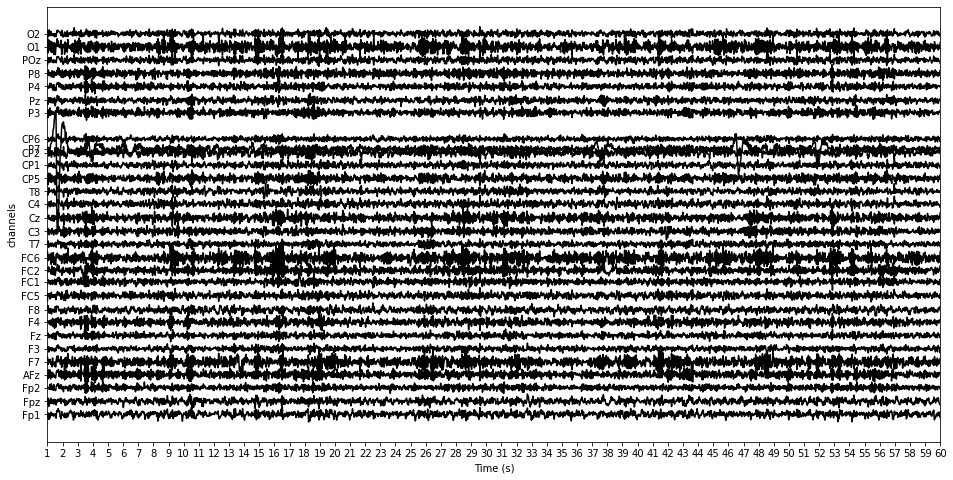

In [16]:
inicio = 1
fin    = 60
xticks = np.arange(inicio*srate,(fin+1)*srate,srate)
fig,ax = plt.subplots(ncols=1,figsize=(16,8))
#fig.suptitle('Series temporales (uV)')
yticks=[]
for c in np.arange(ch):
    temp = EEG_sujeto_10_2[c,inicio*srate:fin*srate]
    dmin=np.min(temp)
    dmax=np.max(temp)
    vmedio = np.mean([dmin,dmax])+30*c
    yticks.append(vmedio)
    ax.plot(np.arange(inicio*srate,fin*srate),vmedio*np.ones_like(temp)+temp,'k')
ax.set_xlim([inicio*srate,fin*srate])
ax.set_xticks(xticks)
ax.set_xticklabels(np.arange(inicio,fin+1))
ax.set_yticks(yticks)
ax.set_yticklabels(mont1020_30.ch_names)
ax.set_ylabel('channels')
ax.set_xlabel('Time (s)')
  
plt.show()

## Sujeto 12

### Cargo bl1

In [17]:
sujeto_12_1 = pd.read_csv(dirname+'suj_12_bl_1.txt', sep=',', header=None)

EEG_sujeto_12_1 = sujeto_12_1.to_numpy()
srate=128
ch    = EEG_sujeto_12_1.shape[0]
samples = EEG_sujeto_12_1.shape[1] 

print("Sampling rate: {:.2f} Hz".format(srate))
print("Data shape: {:d} samples x {:d} channels".format(EEG_sujeto_12_1.shape[1], EEG_sujeto_12_1.shape[0]))
print("Tiempo total : {:.2f} ".format(samples/srate))

Sampling rate: 128.00 Hz
Data shape: 7681 samples x 30 channels
Tiempo total : 60.01 


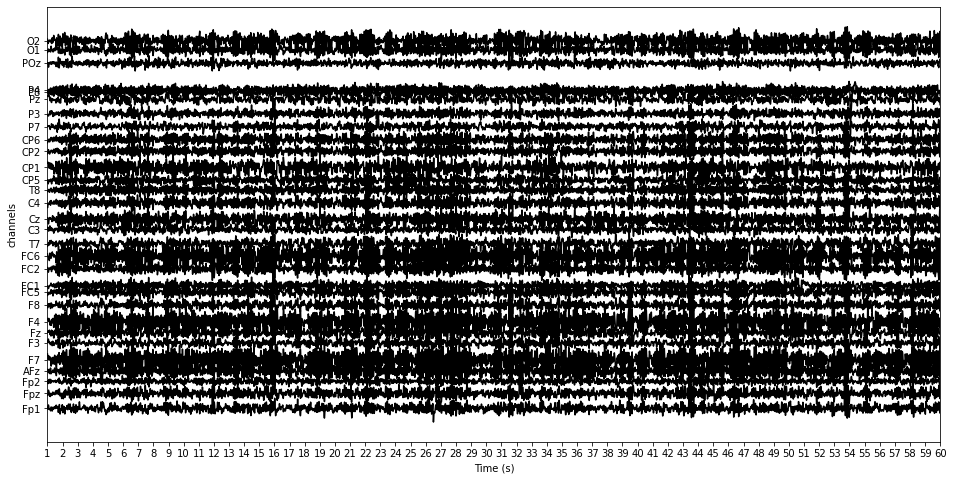

In [18]:
inicio = 1
fin    = 60
xticks = np.arange(inicio*srate,(fin+1)*srate,srate)
fig,ax = plt.subplots(ncols=1,figsize=(16,8))
#fig.suptitle('Series temporales (uV)')
yticks=[]
for c in np.arange(ch):
    temp = EEG_sujeto_12_1[c,inicio*srate:fin*srate]
    dmin=np.min(temp)
    dmax=np.max(temp)
    vmedio = np.mean([dmin,dmax])+30*c
    yticks.append(vmedio)
    ax.plot(np.arange(inicio*srate,fin*srate),vmedio*np.ones_like(temp)+temp,'k')
ax.set_xlim([inicio*srate,fin*srate])
ax.set_xticks(xticks)
ax.set_xticklabels(np.arange(inicio,fin+1))
ax.set_yticks(yticks)
ax.set_yticklabels(mont1020_30.ch_names)
ax.set_ylabel('channels')
ax.set_xlabel('Time (s)')
  
plt.show()

### Cargo bl2

In [19]:
sujeto_12_2 = pd.read_csv(dirname+'suj_12_bl_2.txt', sep=',', header=None)

EEG_sujeto_12_2 = sujeto_12_2.to_numpy()
srate=128
ch    = EEG_sujeto_12_2.shape[0]
samples = EEG_sujeto_12_2.shape[1] 

print("Sampling rate: {:.2f} Hz".format(srate))
print("Data shape: {:d} samples x {:d} channels".format(EEG_sujeto_12_2.shape[1], EEG_sujeto_12_2.shape[0]))
print("Tiempo total : {:.2f} ".format(samples/srate))

Sampling rate: 128.00 Hz
Data shape: 7681 samples x 30 channels
Tiempo total : 60.01 


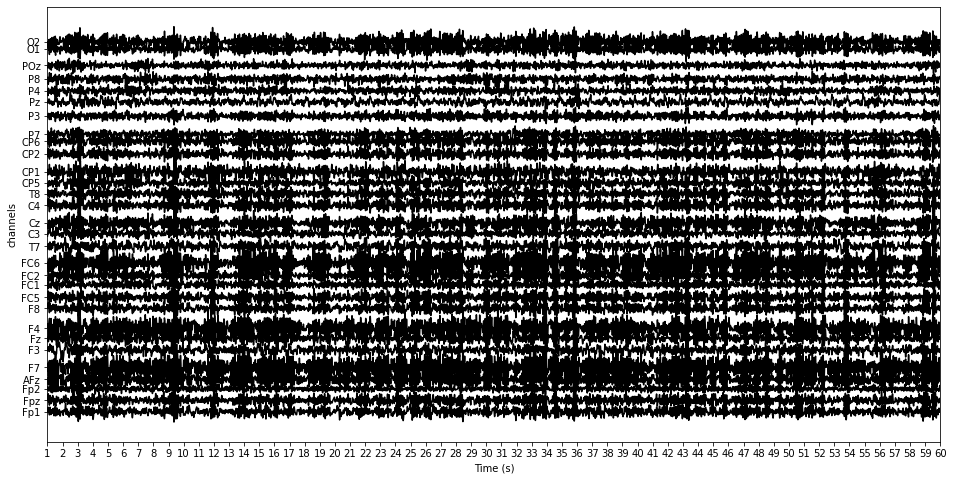

In [20]:
inicio = 1
fin    = 60
xticks = np.arange(inicio*srate,(fin+1)*srate,srate)
fig,ax = plt.subplots(ncols=1,figsize=(16,8))
#fig.suptitle('Series temporales (uV)')
yticks=[]
for c in np.arange(ch):
    temp = EEG_sujeto_12_2[c,inicio*srate:fin*srate]
    dmin=np.min(temp)
    dmax=np.max(temp)
    vmedio = np.mean([dmin,dmax])+30*c
    yticks.append(vmedio)
    ax.plot(np.arange(inicio*srate,fin*srate),vmedio*np.ones_like(temp)+temp,'k')
ax.set_xlim([inicio*srate,fin*srate])
ax.set_xticks(xticks)
ax.set_xticklabels(np.arange(inicio,fin+1))
ax.set_yticks(yticks)
ax.set_yticklabels(mont1020_30.ch_names)
ax.set_ylabel('channels')
ax.set_xlabel('Time (s)')
  
plt.show()

## Sujeto 13

### Cargo bl1

In [21]:
sujeto_13_1 = pd.read_csv(dirname+'suj_13_bl_1.txt', sep=',', header=None)

EEG_sujeto_13_1 = sujeto_13_1.to_numpy()
srate=128
ch    = EEG_sujeto_13_1.shape[0]
samples = EEG_sujeto_13_1.shape[1] 

print("Sampling rate: {:.2f} Hz".format(srate))
print("Data shape: {:d} samples x {:d} channels".format(EEG_sujeto_13_1.shape[1], EEG_sujeto_13_1.shape[0]))
print("Tiempo total : {:.2f} ".format(samples/srate))

Sampling rate: 128.00 Hz
Data shape: 7681 samples x 30 channels
Tiempo total : 60.01 


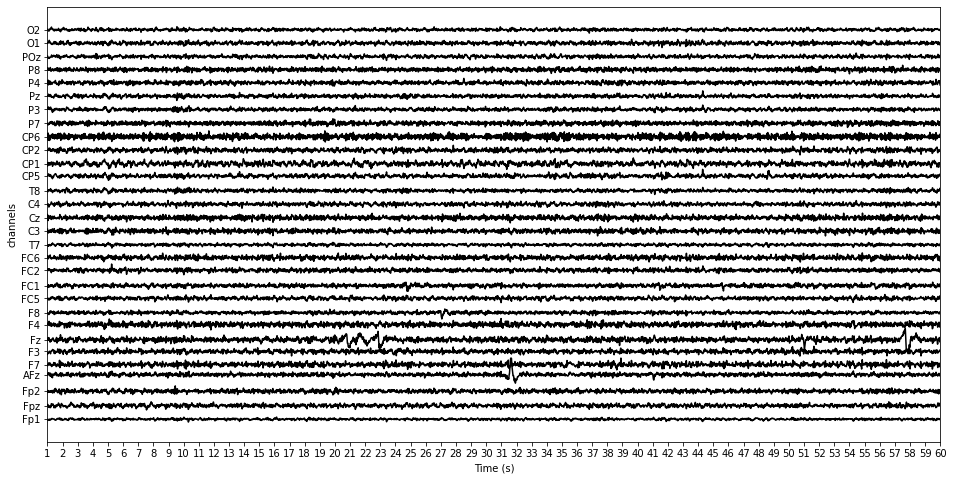

In [22]:
inicio = 1
fin    = 60
xticks = np.arange(inicio*srate,(fin+1)*srate,srate)
fig,ax = plt.subplots(ncols=1,figsize=(16,8))
#fig.suptitle('Series temporales (uV)')
yticks=[]
for c in np.arange(ch):
    temp = EEG_sujeto_13_1[c,inicio*srate:fin*srate]
    dmin=np.min(temp)
    dmax=np.max(temp)
    vmedio = np.mean([dmin,dmax])+30*c
    yticks.append(vmedio)
    ax.plot(np.arange(inicio*srate,fin*srate),vmedio*np.ones_like(temp)+temp,'k')
ax.set_xlim([inicio*srate,fin*srate])
ax.set_xticks(xticks)
ax.set_xticklabels(np.arange(inicio,fin+1))
ax.set_yticks(yticks)
ax.set_yticklabels(mont1020_30.ch_names)
ax.set_ylabel('channels')
ax.set_xlabel('Time (s)')
  
plt.show()

### Cargo bl2

In [23]:
sujeto_13_2 = pd.read_csv(dirname+'suj_13_bl_2.txt', sep=',', header=None)

EEG_sujeto_13_2 = sujeto_13_2.to_numpy()
srate=128
ch    = EEG_sujeto_13_2.shape[0]
samples = EEG_sujeto_13_2.shape[1] 

print("Sampling rate: {:.2f} Hz".format(srate))
print("Data shape: {:d} samples x {:d} channels".format(EEG_sujeto_13_2.shape[1], EEG_sujeto_13_2.shape[0]))
print("Tiempo total : {:.2f} ".format(samples/srate))

Sampling rate: 128.00 Hz
Data shape: 7681 samples x 30 channels
Tiempo total : 60.01 


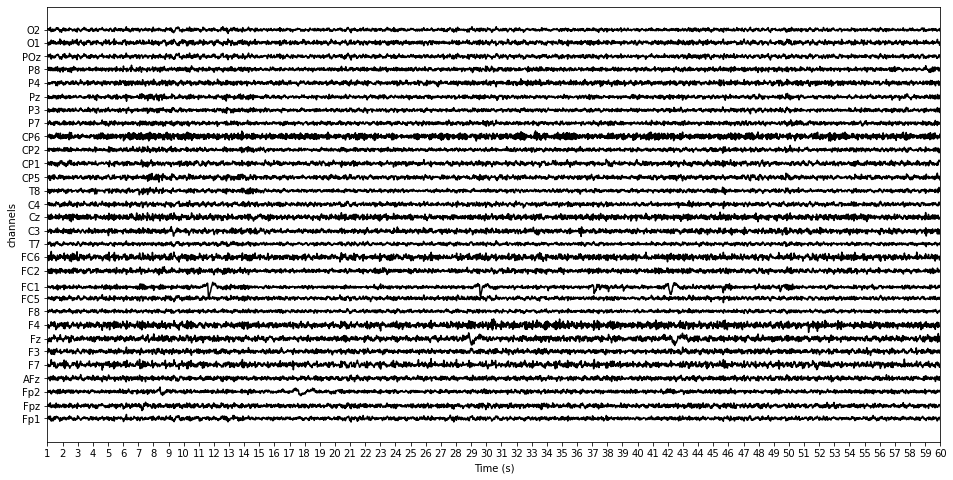

In [24]:
inicio = 1
fin    = 60
xticks = np.arange(inicio*srate,(fin+1)*srate,srate)
fig,ax = plt.subplots(ncols=1,figsize=(16,8))
#fig.suptitle('Series temporales (uV)')
yticks=[]
for c in np.arange(ch):
    temp = EEG_sujeto_13_2[c,inicio*srate:fin*srate]
    dmin=np.min(temp)
    dmax=np.max(temp)
    vmedio = np.mean([dmin,dmax])+30*c
    yticks.append(vmedio)
    ax.plot(np.arange(inicio*srate,fin*srate),vmedio*np.ones_like(temp)+temp,'k')
ax.set_xlim([inicio*srate,fin*srate])
ax.set_xticks(xticks)
ax.set_xticklabels(np.arange(inicio,fin+1))
ax.set_yticks(yticks)
ax.set_yticklabels(mont1020_30.ch_names)
ax.set_ylabel('channels')
ax.set_xlabel('Time (s)')
  
plt.show()

# Graficar los promedios de la topografía para cada participante. ¿Hay diferencias entre los dos períodos de reposo?

In [25]:
#Creo una dataframe con los canales y los promedios de cada canal para cada sujeto en el período 1 (mean1) y en el 2 (mean2)

promedios=pd.DataFrame()
promedios['ch_names'] = mont1020_30.ch_names
promedios['sujeto8_mean1'] = sujeto_8_1.iloc[:, 1:].mean(axis=1)
promedios['sujeto8_mean2'] = sujeto_8_2.iloc[:, 1:].mean(axis=1)
promedios['sujeto9_mean1'] = sujeto_9_1.iloc[:, 1:].mean(axis=1)
promedios['sujeto9_mean2'] = sujeto_9_2.iloc[:, 1:].mean(axis=1)
promedios['sujeto10_mean1'] = sujeto_10_1.iloc[:, 1:].mean(axis=1)
promedios['sujeto10_mean2'] = sujeto_10_2.iloc[:, 1:].mean(axis=1)
promedios['sujeto12_mean1'] = sujeto_12_1.iloc[:, 1:].mean(axis=1)
promedios['sujeto12_mean2'] = sujeto_12_2.iloc[:, 1:].mean(axis=1)
promedios['sujeto13_mean1'] = sujeto_13_1.iloc[:, 1:].mean(axis=1)
promedios['sujeto13_mean2'] = sujeto_13_2.iloc[:, 1:].mean(axis=1)

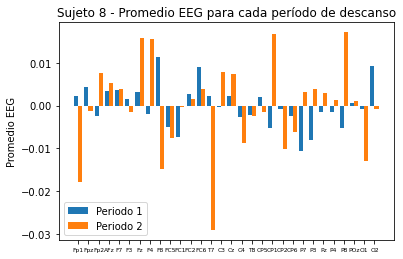

In [26]:
# Grafico promedios

fig, ax = plt.subplots()
channels= mont1020_30.ch_names
periodo1= promedios['sujeto8_mean1'].to_list()
periodo2= promedios['sujeto8_mean2'].to_list()
x = np.arange(len(channels))
width = 0.40
rects1 = ax.bar(x - width/2, periodo1, width, label='Periodo 1')
rects2 = ax.bar(x + width/2, periodo2, width, label='Periodo 2')
ax.set_ylabel('Promedio EEG')
ax.set_title('Sujeto 8 - Promedio EEG para cada período de descanso')
ax.set_xticks(x)
ax.set_xticklabels(channels)
ax.xaxis.set_tick_params(labelsize=6)
ax.legend()
plt.show()


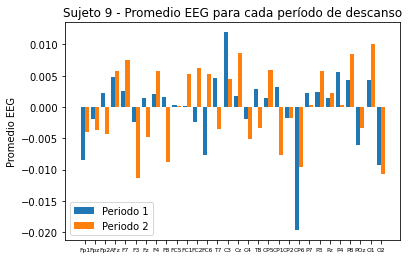

In [27]:
fig, ax = plt.subplots()
channels= mont1020_30.ch_names
periodo1= promedios['sujeto9_mean1'].to_list()
periodo2= promedios['sujeto9_mean2'].to_list()
x = np.arange(len(channels))
width = 0.40
rects1 = ax.bar(x - width/2, periodo1, width, label='Periodo 1')
rects2 = ax.bar(x + width/2, periodo2, width, label='Periodo 2')
ax.set_ylabel('Promedio EEG')
ax.set_title('Sujeto 9 - Promedio EEG para cada período de descanso')
ax.set_xticks(x)
ax.set_xticklabels(channels)
ax.xaxis.set_tick_params(labelsize=6)
ax.legend()
plt.show()


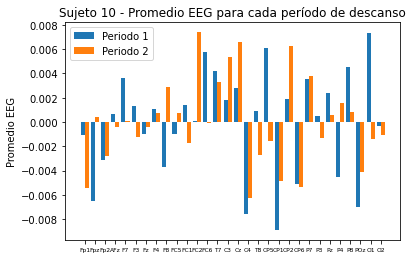

In [28]:
fig, ax = plt.subplots()
channels= mont1020_30.ch_names
periodo1= promedios['sujeto10_mean1'].to_list()
periodo2= promedios['sujeto10_mean2'].to_list()
x = np.arange(len(channels))
width = 0.40
rects1 = ax.bar(x - width/2, periodo1, width, label='Periodo 1')
rects2 = ax.bar(x + width/2, periodo2, width, label='Periodo 2')
ax.set_ylabel('Promedio EEG')
ax.set_title('Sujeto 10 - Promedio EEG para cada período de descanso')
ax.set_xticks(x)
ax.set_xticklabels(channels)
ax.xaxis.set_tick_params(labelsize=6)
ax.legend()
plt.show()

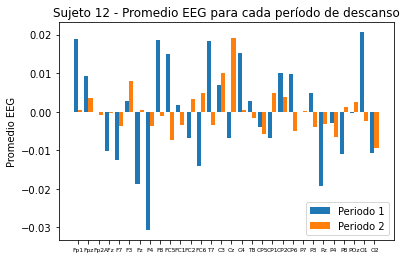

In [29]:
fig, ax = plt.subplots()
channels= mont1020_30.ch_names
periodo1= promedios['sujeto12_mean1'].to_list()
periodo2= promedios['sujeto12_mean2'].to_list()
x = np.arange(len(channels))
width = 0.40
rects1 = ax.bar(x - width/2, periodo1, width, label='Periodo 1')
rects2 = ax.bar(x + width/2, periodo2, width, label='Periodo 2')
ax.set_ylabel('Promedio EEG')
ax.set_title('Sujeto 12 - Promedio EEG para cada período de descanso')
ax.set_xticks(x)
ax.set_xticklabels(channels)
ax.xaxis.set_tick_params(labelsize=6)
ax.legend()
plt.show()

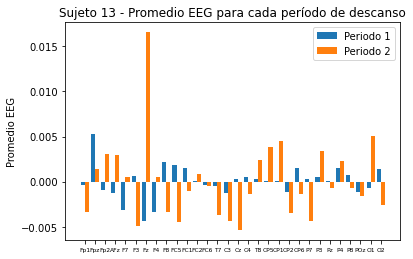

In [30]:
fig, ax = plt.subplots()
channels= mont1020_30.ch_names
periodo1= promedios['sujeto13_mean1'].to_list()
periodo2= promedios['sujeto13_mean2'].to_list()
x = np.arange(len(channels))
width = 0.40
rects1 = ax.bar(x - width/2, periodo1, width, label='Periodo 1')
rects2 = ax.bar(x + width/2, periodo2, width, label='Periodo 2')
ax.set_ylabel('Promedio EEG')
ax.set_title('Sujeto 13 - Promedio EEG para cada período de descanso')
ax.set_xticks(x)
ax.set_xticklabels(channels)
ax.xaxis.set_tick_params(labelsize=6)
ax.legend()
plt.show()

# Análisis de Componentes Principales

## Sujeto8

Analisis de variabilidad explicada para bl1= [0.37113744 0.16141793 0.11307898 0.06199946]
Analisis de variabilidad explicada para bl2= [0.42432642 0.13965016 0.12043969 0.07937082]


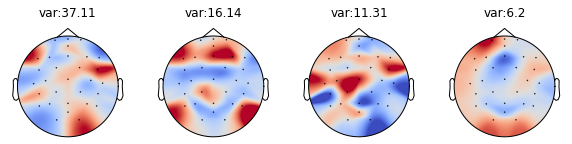

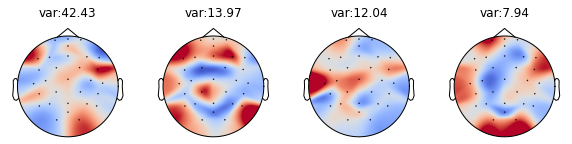

In [31]:
# Cargo PCA de Scikit Learn y utilizo fit_transform sobre el sujeto

pca = decomposition.PCA(n_components=4)

# Bl1
pca.fit(sujeto_8_1)
componentes_sj_8_1 = pca.transform(sujeto_8_1)

variabilidad_bl1=pca.explained_variance_ratio_

# Reviso la variabilidad explicada
print("Analisis de variabilidad explicada para bl1=",variabilidad_bl1)

# Bl2
pca.fit(sujeto_8_2)
componentes_sj_8_2 = pca.transform(sujeto_8_2)
variabilidad_bl2=pca.explained_variance_ratio_


# Grafico de Topologias bl1 con sus principales componentes


fig2, ax = plt.subplots(ncols=componentes_sj_8_1.shape[1], figsize=(10, 3), gridspec_kw=dict(top=0.9),
                       sharex=True, sharey=True)
for p in range(componentes_sj_8_1.shape[1]):
    mne.viz.plot_topomap(componentes_sj_8_1[:,p],
                    info_eeg,
                    cmap='coolwarm', contours=0,
                    axes=ax[p],show=False)
    ax[p].set_title('var:'+str(round(variabilidad_bl1[p]*100,2)) ) 

# Reviso la variabilidad explicada
print("Analisis de variabilidad explicada para bl2=",variabilidad_bl2)

# Grafico de Topologias bl2 con sus principales componentes

fig2, ax = plt.subplots(ncols=componentes_sj_8_2.shape[1], figsize=(10, 3), gridspec_kw=dict(top=0.9),
                       sharex=True, sharey=True)
for p in range(componentes_sj_8_2.shape[1]):
    mne.viz.plot_topomap(componentes_sj_8_2[:,p],
                    info_eeg,
                    cmap='coolwarm', contours=0,
                    axes=ax[p],show=False)
    ax[p].set_title('var:'+str(round(variabilidad_bl2[p]*100,2)) ) 

Analisis de variabilidad explicada= [0.39762413 0.14786792 0.11514557 0.07006719]


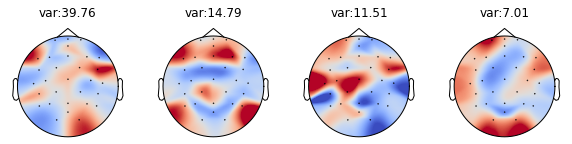

In [32]:
# Concateno ambas mediciones del sujeto
sujeto_8_completo= pd.concat([sujeto_8_1,sujeto_8_2],axis=1)

# Cargo PCA de Scikit Learn y utilizo fit_transform sobre el sujeto
pca = decomposition.PCA(n_components=4)
pca.fit(sujeto_8_completo)
componentes_sj_8 = pca.transform(sujeto_8_completo)

variabilidad=pca.explained_variance_ratio_

# Reviso la variabilidad explicada
print("Analisis de variabilidad explicada=",variabilidad)

# Grafico de Topologias para el Sujeto completo con sus principales componentes
fig2, ax = plt.subplots(ncols=componentes_sj_8.shape[1], figsize=(10, 3), gridspec_kw=dict(top=0.9),
                       sharex=True, sharey=True)
for p in range(componentes_sj_8.shape[1]):
    mne.viz.plot_topomap(componentes_sj_8[:,p],
                    info_eeg,
                    cmap='coolwarm', contours=0,
                    axes=ax[p],show=False)
    ax[p].set_title('var:'+str(round(variabilidad[p]*100,2)) ) 

# Calculo de GFP

In [33]:
# Calulo del GFP 
sujeto_8_1['GFP']=np.square(np.power(sujeto_8_1,2).sum(axis=1)/7681)
sujeto_8_1['GFP']=sujeto_8_1['GFP'].agg({lambda x: round(x,4)})
sujeto_8_1

,0,1,2,3,4,5,6,7,8,9,...,7672,7673,7674,7675,7676,7677,7678,7679,7680,GFP
0,8.80530,12.52700,17.01900,19.21100,17.26000,11.79300,5.34650,0.59356,-1.25020,-0.71929,...,-6.67380,-7.28310,-8.04120,-9.678200,-11.573000,-12.10500,-9.87460,-4.88300,1.134000,4508.6079
1,2.85210,4.26220,5.80660,4.89800,0.56435,-5.52090,-10.18700,-11.09200,-8.31730,-4.00820,...,-3.05760,-6.27700,-7.32330,-6.195300,-3.940900,-1.75700,-0.13757,1.20510,2.622000,1031.4450
2,8.45990,10.62800,9.06120,3.30680,-4.48400,-10.78600,-12.96500,-10.87600,-6.63970,-2.89450,...,1.64980,-0.60690,-1.43660,-0.092055,2.519500,4.51780,4.48530,2.51950,0.058498,284.0027
3,1.41010,5.55080,4.78960,-0.09808,-5.50270,-7.66960,-5.36720,-0.53771,3.42130,4.27270,...,10.53600,11.41300,10.11700,7.698300,4.760300,1.33140,-2.61860,-6.58260,-9.435500,918.5264
4,0.89534,-3.81920,-10.75900,-15.65800,-14.48100,-6.59000,4.27520,12.22100,13.17100,7.66290,...,22.45500,24.47800,21.34900,15.801000,9.676600,3.07190,-4.72980,-13.53800,-21.329000,11191.0803
5,7.12060,5.54910,2.10710,-3.12350,-8.53180,-12.00400,-12.47200,-10.66000,-8.34610,-6.76710,...,-1.28410,-4.28160,-6.48550,-6.905900,-5.394600,-2.63420,0.26194,2.21720,2.484900,1629.4095
6,12.02000,13.00300,9.04820,2.02780,-4.47870,-7.46560,-6.24340,-2.49520,1.26080,3.56310,...,-10.16800,-9.08440,-8.35570,-7.170400,-5.183600,-2.83860,-1.13680,-1.00400,-2.647800,9440.0893
7,4.36420,5.74510,2.45080,-4.24140,-10.94600,-14.60300,-14.32200,-11.37300,-7.67940,-4.24970,...,12.53800,11.50300,8.95870,6.150400,3.516800,0.68625,-2.86000,-7.00430,-10.678000,2609.8523
8,1.43280,-1.28140,-1.87170,-0.14234,2.38180,3.56150,2.39050,-0.15421,-1.94370,-1.48450,...,-2.29480,-4.74250,-5.00000,-4.292900,-3.848600,-3.89490,-3.61580,-2.12760,0.361210,3902.8695
9,5.41930,6.61740,10.18300,13.55100,13.38400,8.33600,0.42248,-6.25320,-8.49880,-6.32430,...,-11.37600,-19.39000,-24.50100,-25.253000,-21.994000,-16.51100,-10.85700,-6.27770,-2.952800,4980.6696



## Otras consgnas pendientes

### Calcular las componentes principales para el total de los datos (concatenados en el tiempo). ¿Qué peso tiene cada proyección en los distintos períodos de reposo?

### Referenciar los datos al promedio por sample. 

### Calcular el Campo de Potencia Global (GFP). Encontrar los picos del GFP. Guardar los vectores del GFP para los máximos encontrados.